In [1]:
import wraplorenzmie.utilities.utilities as utilities
import wraplorenzmie.fits.fit as fit
import imageio
# For Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white', font_scale=2)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)


No module named 'pylorenzmie.fitting.cython.cminimizers'
Populating the interactive namespace from numpy and matplotlib


In [2]:
vid = utilities.video_reader("/media/maxime/Maxtor/09102019/film75fps1_15k/Basler_acA1920-155um__22392621__20191009_143652597.mp4")

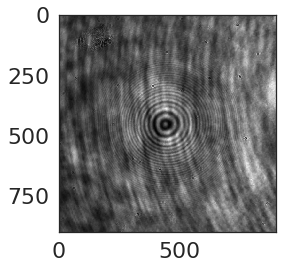

In [3]:
image = vid.get_image(1)
plt.imshow(image,cmap="gray")

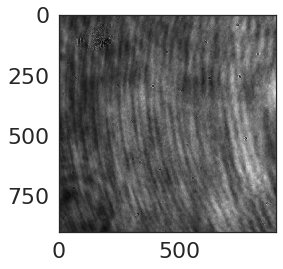

In [4]:
vid.number = 100000
pathbg = "/media/maxime/Maxtor/09102019/film75fps1_15k/MED_to_median.tif"

vid.background = np.array(imageio.imread(pathbg))
plt.imshow(vid.background,cmap="gray")

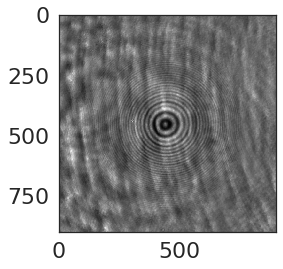

In [5]:
normed_image = utilities.normalize(image,vid.background)
plt.imshow(normed_image,cmap="gray")
normed_image = normed_image

In [6]:
feature, circ = utilities.center_find(normed_image)
feature

array([[439.29852519, 456.71324004, 272.        , 272.        ]])

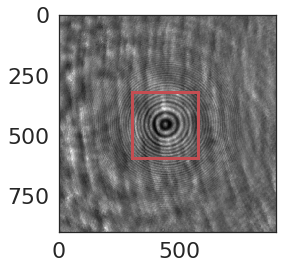

In [7]:
utilities.plot_bounding(normed_image,feature)

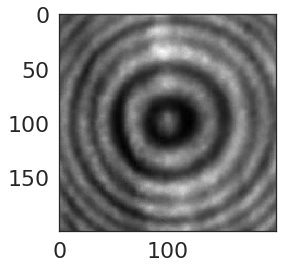

In [8]:
x, y, w, h = feature[0]
h=200
cropped = fit.crop(normed_image, int(x), int(y), int(h))
plt.imshow(cropped,cmap = "gray")

In [9]:
fitter = fit.fitting(cropped,0.633,0.08)
fitter.make_guess(2.51,1.581,25,fit_r=False, fit_n=False)

In [10]:
result = fitter.fit_single(cropped, method = "lm")

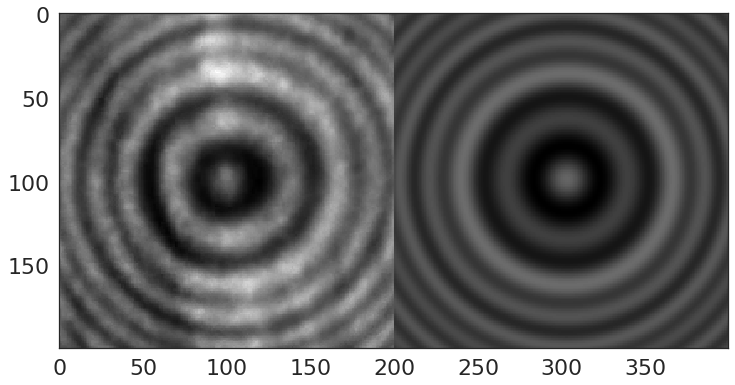

In [11]:
fitter.show_results()

In [12]:
fitter.fit_video(vid = vid,savefile="test_100k.dat",xc = x ,yc= y, h = 200, n_end=100000,method = "lm")

100%|██████████| 99999/99999 [1:04:45<00:00, 25.74it/s]


In [13]:
results = np.fromfile('test_100k.dat', dtype=float32)
results = results.reshape((len(results)//10,10))

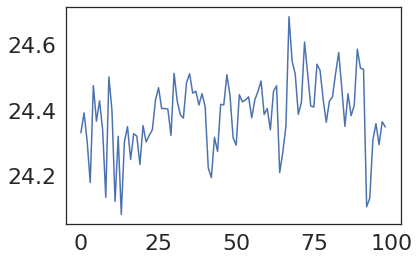

In [18]:
plt.plot(results[1:100,2]*0.08)

In [53]:
N,X =np.histogram(0.08*(results[:,2]-np.min(results[:,2])),bins=50,density=True)

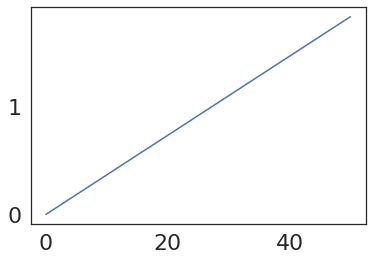

In [54]:
plt.plot()

In [67]:
min(X)

0.0

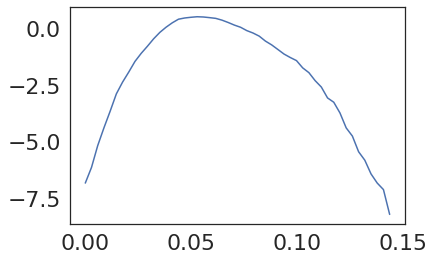

In [72]:
plt.plot(X[0:-1]*0.08,np.log(N))

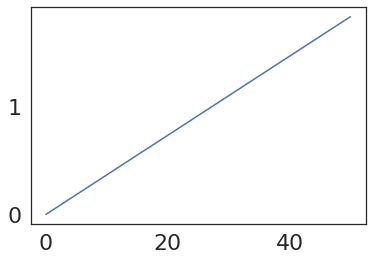

In [61]:
plt.plot(X)